<a href="https://colab.research.google.com/github/prbhtmahi/Iris_project/blob/main/spark_Second.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns
from sklearn.cluster import KMeans
%matplotlib inline

In [35]:
iris = datasets.load_iris()
#iris_data = pd.DataFrame(iris.data , columns=iris.feature_names)


In [36]:
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [37]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [38]:
iris.shape

(150, 5)

In [39]:
iris.keys()

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [40]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


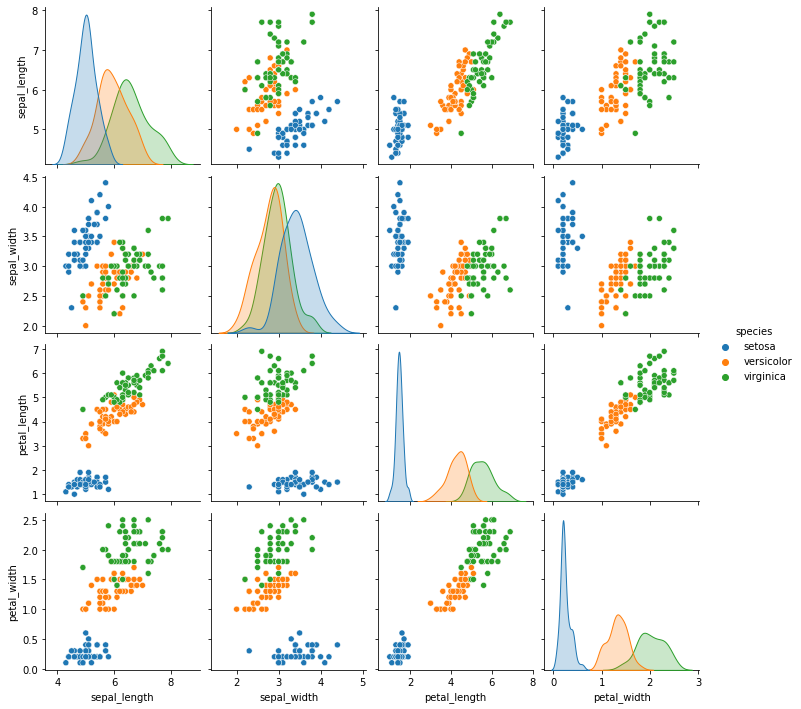

In [41]:
sns.pairplot(iris, hue='species');

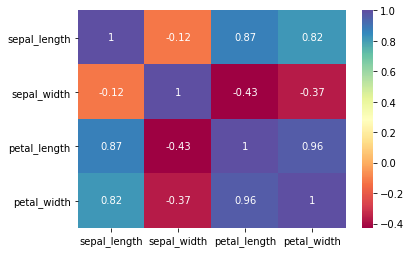

In [42]:
sns.heatmap(iris.corr(), annot=True, cmap='Spectral');

In [43]:
from sklearn.preprocessing import LabelEncoder
l= LabelEncoder()
species = l.fit_transform(iris['species'])
iris['species'] = species
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [48]:
input = iris.drop(['species'], axis=1)
input.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [50]:
target = iris['species']
target.head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(input, target,random_state=0)

In [53]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((112, 4), (38, 4), (112,), (38,))

In [55]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2) #setting k = 1

In [56]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [63]:
X_pred = knn.predict(X_train)
print("Test set score : {}".format(np.mean(X_pred == y_train)))

Test set score : 0.9642857142857143


In [57]:
y_pred = knn.predict(X_test)

In [58]:
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2])

In [59]:
print("Test set score : {}".format(np.mean(y_pred == y_test)))

Test set score : 0.9736842105263158


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


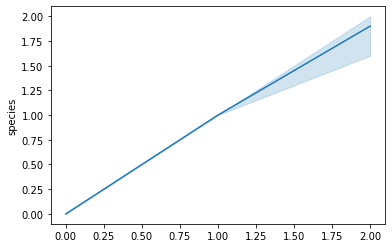

In [68]:
sns.lineplot(y_pred, y_test);

In [73]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
m = model.fit(X_train,y_train)

In [74]:
X_pred = m.predict(X_test)

In [76]:
core = m.score(X_test, y_test)

In [77]:
core

0.9736842105263158

In [80]:
y_pred = m.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_pred, y_test)

0.9736842105263158

In [81]:
confusion_matrix(y_pred, y_test)

array([[13,  0,  0],
       [ 0, 15,  0],
       [ 0,  1,  9]])

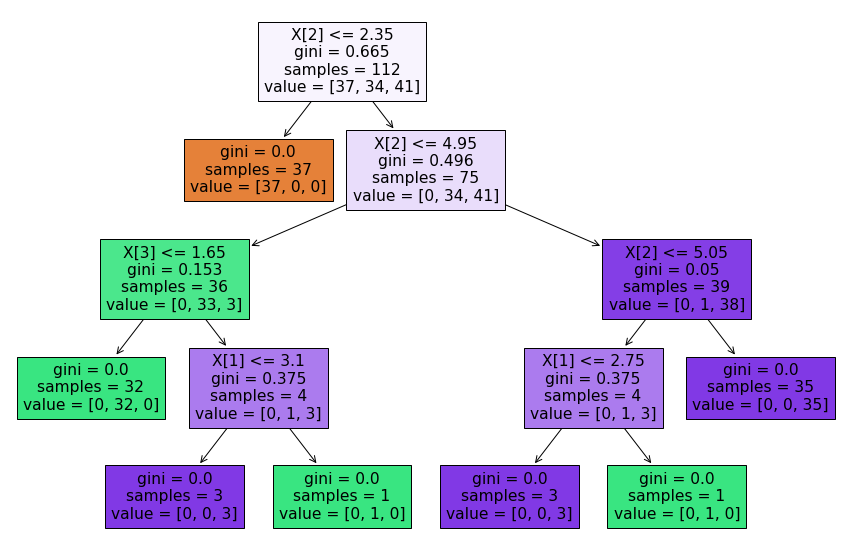

In [90]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(m,filled=True);